# MSiA 420 - Predictive Analytics II - Final Project
## Group 3: Alejandra Lelo de Larrea Ibarra, Kiran Jyothi Sheena, Lixuan (Ellen) Chen, Wencheng Zhang

# EDA vars 17-24

In [168]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [169]:
data = pd.read_csv("hotel_bookings.csv")

# Read data 
data = pd.read_csv("hotel_bookings.csv")

# Dimensions 
print("Dimensions: " + str(data.shape))

# Print header 
data.head()

Dimensions: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Individual Effects

### is_repeated_guest (strong)

In [170]:
print("The number of missing values in is_repeated_guest: ", data['is_repeated_guest'].isnull().sum())

The number of missing values in is_repeated_guest:  0


<AxesSubplot:title={'center':'how many unique values is_repeated_guest has'}>

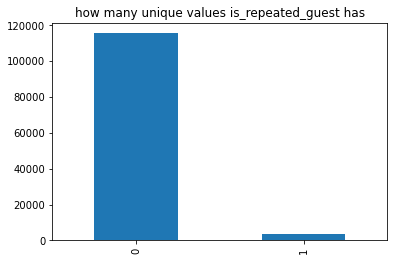

In [171]:
data['is_repeated_guest'].value_counts().plot(kind='bar', title='how many unique values is_repeated_guest has')

most of the booking names is not repeated guest (0). Only some of them are repeated customers (1). <br>
I assume that repeated customer are less likely to cancel

In [172]:
pd.crosstab(index=data['is_canceled'],columns=data['is_repeated_guest'])

is_repeated_guest,0,1
is_canceled,,
0,71908,3258
1,43672,552


### previous_cancellations (strong)

In [173]:
print("The number of missing values in previous_cancellations: ", data['previous_cancellations'].isnull().sum())

The number of missing values in previous_cancellations:  0


In [174]:
data['previous_cancellations'].describe(include='all')

count    119390.000000
mean          0.087118
std           0.844336
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: previous_cancellations, dtype: float64

In [175]:
data['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

<AxesSubplot:title={'center':'Distribution in previous_cancellations'}>

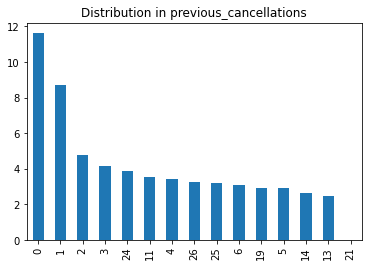

In [176]:
np.log(data['previous_cancellations'].value_counts()).plot(kind='bar', title='Distribution in previous_cancellations')

0: no customer profile associated with the bookings. However, there are some case where repeated customer has never cancelled a booking<br>
1/2/3 are reasonable numbers because it is possible for a same customer to cancel multiple times.<br>
However 15+ cancelled history may come from agents or group order. For example, there are 26 customers that cancelled 26 times before.

In [177]:
pd.crosstab(index=data['is_canceled'],columns=data['previous_cancellations'])

previous_cancellations,0,1,2,3,4,5,6,11,13,14,19,21,24,25,26
is_canceled,,,,,,,,,,,,,,,
0,74624,337,78,45,24,17,15,25,1,0,0,0,0,0,0
1,38282,5714,38,20,7,2,7,10,11,14,19,1,48,25,26


### previous_bookings_not_canceled (Strong)

In [178]:
print("The number of missing values in previous_bookings_not_canceled: ", data['previous_bookings_not_canceled'].isnull().sum())

The number of missing values in previous_bookings_not_canceled:  0


In [179]:
data['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

115770 has 0, which means that no customer profiles associated with this booking<br>\
However, it may also means that a repeated customer cancel all of booking before

In [180]:
np.corrcoef(data['previous_bookings_not_canceled'],data['previous_cancellations'])

array([[1.        , 0.15272811],
       [0.15272811, 1.        ]])

previous_bookings_not_canceled has a weak correlation with previous_cancellations. <br>
We may need more thinking about these two variables

In [181]:
len(data[(data['previous_cancellations']==0)&(data['previous_bookings_not_canceled']==0)])

109933

There are 109933 that has zero previous_cancellations and zero previous_bookings_not_canceled, which are new customers<br>
I suppose we could find a way to combine previous_bookings_not_canceled and previous_cancellations together

In [182]:
pd.crosstab(index=data['is_canceled'],columns=data['previous_bookings_not_canceled'])

previous_bookings_not_canceled,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,71746,1463,548,316,217,170,112,83,67,60,...,1,1,1,1,1,1,1,1,1,1
1,44024,79,32,17,12,11,3,5,3,0,...,0,0,0,0,0,0,0,0,0,0


### reserved_room_type (strong)

In [183]:
print("The number of missing values in reserved_room_type: ", data['reserved_room_type'].isnull().sum())

The number of missing values in reserved_room_type:  0


In [184]:
data['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

<AxesSubplot:title={'center':'how many unique values reserved_room_type has'}>

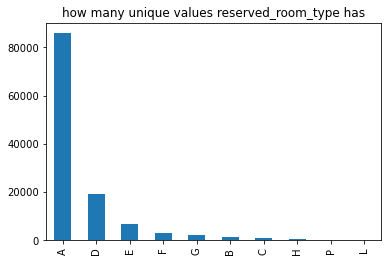

In [185]:
data['reserved_room_type'].value_counts().plot(kind='bar', title='how many unique values reserved_room_type has')

Most of reserved room belongs to A.previous_bookings_not_canceled

In [186]:
pd.crosstab(index=data['is_canceled'],columns=data['reserved_room_type'])

reserved_room_type,A,B,C,D,E,F,G,H,L,P
is_canceled,,,,,,,,,,
0,52364,750,624,13099,4621,2017,1331,356,4,0
1,33630,368,308,6102,1914,880,763,245,2,12


### assigned_room_type (strong)

In [187]:
print("The number of missing values in assigned_room_type: ", data['assigned_room_type'].isnull().sum())

The number of missing values in assigned_room_type:  0


In [188]:
data['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [189]:
print("reserved room = assigned room: ", len(data[(data['reserved_room_type'] == data['assigned_room_type'])]))

reserved room = assigned room:  104473


In [190]:
print("reserved room != assigned room: ", len(data[(data['reserved_room_type'] != data['assigned_room_type'])]))

reserved room != assigned room:  14917


There are 14917 assigned room that is not reserved room. I think that we could create a new variables <br>
whether the assigned room is different from the reserved room

In [191]:
pd.crosstab(index=data['is_canceled'],columns=data['assigned_room_type'])

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
is_canceled,,,,,,,,,,,,
0,41105,1651,1929,18960,5838,2824,1773,461,358,267,0,0
1,32948,512,446,6362,1968,927,780,251,5,12,1,12


### booking_changes (strong)

In [192]:
print("The number of missing values in booking_changes: ", data['booking_changes'].isnull().sum())

The number of missing values in booking_changes:  0


In [193]:
data['booking_changes'].describe()

count    119390.000000
mean          0.221124
std           0.652306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: booking_changes, dtype: float64

In [194]:
data['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

<AxesSubplot:title={'center':'how many unique values booking_changes has'}>

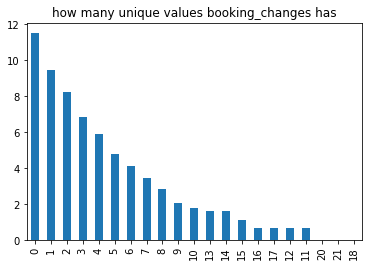

In [195]:
np.log(data['booking_changes'].value_counts()).plot(kind='bar', title='how many unique values booking_changes has')

In [196]:
pd.crosstab(index=data['is_canceled'],columns=data['booking_changes'])

booking_changes,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,20,21
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,59923,10894,3039,783,309,98,45,28,13,7,...,2,2,5,4,3,1,2,1,1,1
1,41391,1807,766,144,67,20,18,3,4,1,...,0,0,0,1,0,1,0,0,0,0


### deposit_type (strong)

In [197]:
print("The number of missing values in deposit_type: ", data['deposit_type'].isnull().sum())

The number of missing values in deposit_type:  0


In [198]:
data['deposit_type'].describe()

count         119390
unique             3
top       No Deposit
freq          104641
Name: deposit_type, dtype: object

In [199]:
data['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

<AxesSubplot:title={'center':'how many unique values deposit_type has'}>

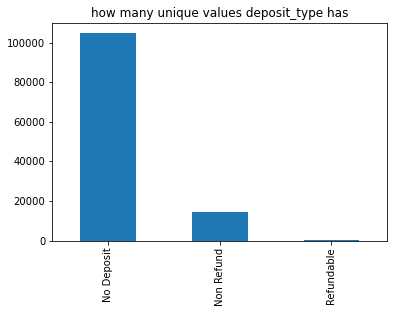

In [200]:
data['deposit_type'].value_counts().plot(kind='bar', title='how many unique values deposit_type has')

In [201]:
pd.crosstab(index=data['is_canceled'],columns=data['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,74947,93,126
1,29694,14494,36


if a customer choose non-refund, it has more likely to cancel. This is interesting phenomon.

### agent

In [202]:
print("The number of missing values in agent: ", data['agent'].isnull().sum())

The number of missing values in agent:  16340


The PMS assured no missing data exists in its database tables. However, in some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

<AxesSubplot:title={'center':'top 10 agents'}>

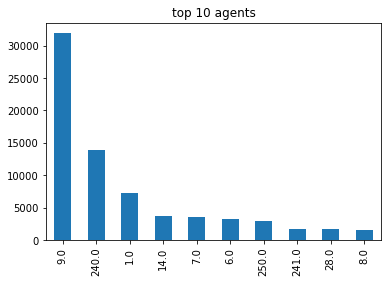

In [203]:
agent_unique = data['agent'].value_counts()
agent_unique.iloc[0:10].plot(kind='bar', title='top 10 agents')

In [204]:
pd.crosstab(index=data['is_canceled'],columns=data['agent'])

agent,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,495.0,497.0,502.0,508.0,509.0,510.0,526.0,527.0,531.0,535.0
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,1911,128,565,16,181,2265,3065,1087,18697,196,...,7,1,24,6,8,2,9,35,22,3
1,5280,34,771,31,149,1025,474,427,13264,64,...,50,0,0,0,2,0,1,0,46,0


## For the next step, I think we should decide business questions, and then come up with more complicated question by using EDA to answer. 